In [1]:
import pandas as pd #loading files as Data frames, data manipulation and analysis
import numpy as np #mathematical calculations
import matplotlib.pyplot as plt #for visualization of different plots
import seaborn as sn #visualization of graphs

In [21]:
advertise = pd.read_csv(r"C:\Users\HP 2231TX\Downloads\Advertising.csv")

In [22]:
advertise.head(10)

,Sno,TV,Radio,Newspaper,Day,Sales
0,1,230.1,37.8,69.2,Weekend,10.1
1,2,44.5,39.3,45.1,Weekdays,8.0
2,3,17.2,45.9,69.3,Weekdays,10.3
3,4,151.5,41.3,58.5,Weekdays,25.4
4,5,180.8,10.8,58.4,Weekdays,13.6
5,6,8.7,48.9,75.0,Weekdays,5.9
6,7,57.5,32.8,23.5,Weekdays,14.4
7,8,120.2,19.6,11.6,Weekdays,6.6
8,9,8.6,2.1,1.0,Weekdays,19.6
9,10,199.8,2.6,21.2,Weekdays,13.4


In [23]:
advertise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [24]:
advertise.isnull().sum()

Sno          0
TV           1
Radio        1
Newspaper    1
Day          3
Sales        0
dtype: int64

In [26]:
advertise = advertise.dropna()

In [27]:
advertise.isnull().sum()

Sno          0
TV           0
Radio        0
Newspaper    0
Day          0
Sales        0
dtype: int64

In [28]:
advertise.columns

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Day', 'Sales'], dtype='object')

In [14]:
X_features = [ 'TV', 'Radio', 'Newspaper', 'Day', 'Sales']

# To Encode Categorical Features 

In [29]:
advertise['Day'].unique()

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [16]:
pd.get_dummies(data['Day'])[0:5]

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [17]:
categorical_features = ['Day']

In [31]:
advertise_encode = pd.get_dummies( data[X_features],columns = categorical_features,drop_first = True )

In [32]:
advertise_encode.head()

,TV,Radio,Newspaper,Sales,Day_Weekdays,Day_Weekend
0,230.1,37.8,69.2,10.1,0,1
1,44.5,39.3,45.1,8.0,1,0
2,17.2,45.9,69.3,10.3,1,0
3,151.5,41.3,58.5,25.4,1,0
4,180.8,10.8,58.4,13.6,1,0


In [33]:
advertise_encode.describe()

,TV,Radio,Newspaper,Sales,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,146.242132,23.152284,30.375635,14.102030,0.766497,0.213198
std,85.439138,14.922793,20.972370,5.192302,0.424137,0.410610
min,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000
25%,74.700000,9.900000,12.900000,10.400000,1.000000,0.000000
50%,149.700000,22.300000,25.900000,12.900000,1.000000,0.000000
75%,218.400000,36.500000,45.100000,17.400000,1.000000,0.000000
max,296.400000,49.600000,100.900000,27.000000,1.000000,1.000000


In [34]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = sm.add_constant( advertise_encode )
Y = advertise['Sales']
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 29 ) #splitting the test & train dataset with random_state = 29

In [35]:
model_1 = sm.OLS(train_y, train_X).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       1.000     
Dependent Variable:    Sales              AIC:                  -9560.0483
Date:                  2020-08-12 15:27   BIC:                  -9538.6546
No. Observations:      157                Log-Likelihood:       4787.0    
Df Model:              6                  F-statistic:          3.438e+30 
Df Residuals:          150                Prob (F-statistic):   0.00      
R-squared:             1.000              Scale:                2.0116e-28
--------------------------------------------------------------------------
              Coef.  Std.Err.           t           P>|t|   [0.025  0.975]
--------------------------------------------------------------------------
const        -0.0000   0.0000               -1.4534 0.1482 -0.0000  0.0000
TV            0.0000   0.0000                3.9374 0.0001  0.0000  0.0000
Radio        -0.0000   0.0000               -4.5699 0.0000 -0.0000 -0.0000
Newspaper    -0.0000   0.0000               -0.6921 0.4900 -0.0000  0.0000
Sales         1.0000   0.0000 4532501523023872.0000 0.0000  1.0000  1.0000
Day_Weekdays  0.0000   0.0000                0.5745 0.5665 -0.0000  0.0000
Day_Weekend   0.0000   0.0000                0.1184 0.9059 -0.0000  0.0000
--------------------------------------------------------------------------
Omnibus:                 1.025           Durbin-Watson:              1.171
Prob(Omnibus):           0.599           Jarque-Bera (JB):           1.093
Skew:                    0.187           Prob(JB):                   0.579
Kurtosis:                2.834           Condition No.:              2088 
==========================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

# RESIDUAL  ANALYSIS

In [38]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
def advertise_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid );
    plt.figure( figsize = (8, 6) );
    probplot.ppplot( line='45' );
    plt.title( title );
    plt.show();

<Figure size 576x432 with 0 Axes>

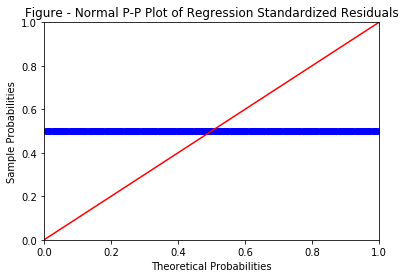

In [46]:
advertise_pp_plot( model_1,"Figure - Normal P-P Plot of Regression Standardized Residuals");

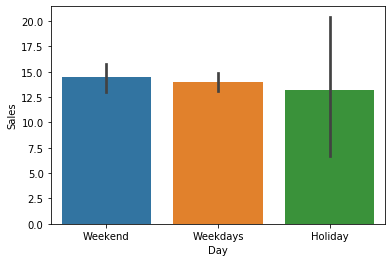

In [40]:
sn.barplot(x = 'Day', y = 'Sales', data = data); #It can be concluded that sales are more  in Weekend followed by weekdays and holiday

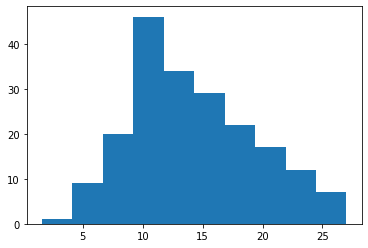

In [41]:
plt.hist( advertise_encode['Sales'] );# highest daily sales achieved is near Rs 10 million

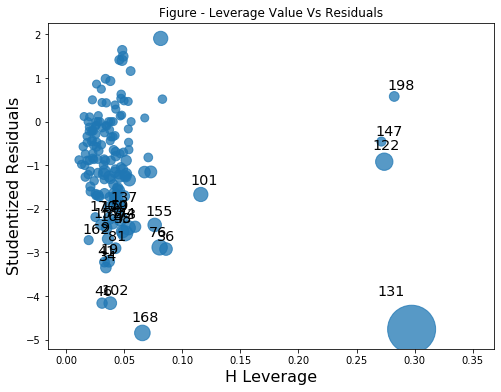

In [42]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( model_1, ax = ax )
plt.title( "Figure - Leverage Value Vs Residuals")
plt.show()

In [43]:
pred_y = np.power( model_1.predict( test_X[train_X.columns] ), 2)# making predictions

In [44]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))# checking the rmse score

299.7134818372379

In [45]:
advertise_encode.corr() #checking the correlation between different variables

,TV,Radio,Newspaper,Sales,Day_Weekdays,Day_Weekend
TV,1.000000,0.055658,0.095794,0.047781,-0.701157,0.661571
Radio,0.055658,1.000000,0.356668,0.001630,0.001294,-0.004410
Newspaper,0.095794,0.356668,1.000000,-0.027103,-0.121552,0.097357
Sales,0.047781,0.001630,-0.027103,1.000000,-0.024109,0.033777
Day_Weekdays,-0.701157,0.001294,-0.121552,-0.024109,1.000000,-0.943123
Day_Weekend,0.661571,-0.004410,0.097357,0.033777,-0.943123,1.000000
